**Authors:** Peter Štrauch, Jozef Hanč, Martina Hančová <br> 
**R consultant:** Andrej Gajdoš <br> 
[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN) *P. J. Šafárik University in Košice, Slovakia* <br> 
email: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)

***
**<font size=6 color=brown> Research study III: In-service teachers</font>** 

**<font size=4> R Shiny perceptions $-$  heatmaps </font>**  


<font size=4> Computational tool: </font> **<font size=4> R, CRAN libraries, own R functions </font>**

# Data

In [1]:
## load libraries
library(readxl)
library(repr)
library(ggplot2)
library(psychometric)
require(gridExtra)
library(plyr)

Loading required package: multilevel
Loading required package: nlme
Loading required package: MASS

Attaching package: ‘psychometric’

The following object is masked from ‘package:ggplot2’:

    alpha

Loading required package: gridExtra


## TAQ data

In [2]:
# data from TAQ - teacher's attitude questionary
datafull <- as.data.frame(read_excel('../data/03_In-service_teachers_attitudes-codes.xlsx'))

# types of data - structure 
str(datafull)

'data.frame':	33 obs. of  30 variables:
 $ ID                         : chr  "1Bmcf1" "4uTAae" "5C5jjh" "8T3pvG" ...
 $ gender                     : chr  "M" "F" "F" "M" ...
 $ timestamp                  : POSIXct, format: "2018-06-28 09:50:04" "2018-07-03 12:17:24" ...
 $ informing students         : chr  "before the test" "at the beginning of the test" "before the test" "before the test" ...
 $ information time           : chr  "5 to 10 min" "less than 5 min" "less than 5 min" "5 to 10 min" ...
 $ student motivation         : num  1 1 3 3 5 4 3 5 3 3 ...
 $ class quality              : num  2 1 2 3 1 3 2 3 3 2 ...
 $ testing recommendations    : chr  "Jasný, zrozumiteľný návod. Bezproblémové prihlásenie študentov." NA NA "Mali sme problém s čitateľnosťou textu, niektorí žiaci použili priblíženie CTRL++" ...
 $ future app use             : chr  "yes" "certainly yes" "yes" "certainly yes" ...
 $ next app extension         : chr  "strongly agree" "strongly agree" "strongly agree" "agree

In [3]:
datafull

ID,gender,timestamp,informing students,information time,student motivation,class quality,testing recommendations,future app use,next app extension,⋯,videos,instruction recommendations,region,school,replacement school,classes,size,n_t,n_s,w_t
<chr>,<chr>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1Bmcf1,M,2018-06-28 09:50:04,before the test,5 to 10 min,1,2,"Jasný, zrozumiteľný návod. Bezproblémové prihlásenie študentov.",yes,strongly agree,⋯,frequently,Zaujímavé úlohy. Nútia študentov rozmýšľať.,western,s096,n,1,5653,12,12,471.0833
4uTAae,F,2018-07-03 12:17:24,at the beginning of the test,less than 5 min,1,1,NA,certainly yes,strongly agree,⋯,quite frequently,NA,central,s144,n,1,3251,9,9,361.2222
5C5jjh,F,2018-06-20 18:39:31,before the test,less than 5 min,3,2,NA,yes,strongly agree,⋯,ocassionally,NA,western,s124,n,1,5653,12,12,471.0833
8T3pvG,M,2018-06-20 11:47:06,before the test,5 to 10 min,3,3,"Mali sme problém s čitateľnosťou textu, niektorí žiaci použili priblíženie CTRL++",certainly yes,agree,⋯,frequently,NA,central,s169,n,1,3251,9,9,361.2222
97V9xH,F,2018-11-26 23:46:23,before the test,5 to 10 min,5,1,NA,certainly yes,strongly agree,⋯,frequently,NA,central,s152,n,1,3251,9,9,361.2222
AAZ4zi,F,2018-06-22 09:21:08,before the test,less than 5 min,4,3,"nepoznala som typ otázok, upozornila by som ich na dlhsie zamyslenie sa nad odpovedou",yes,agree,⋯,ocassionally,"viac hodin pre moznost motivacie, delené hodiny fyziky, ( 34 ziakov je vela aj na diskusiu)",central,s130,n,1,3251,9,9,361.2222
b42fia,F,2018-06-21 09:45:21,before the test,less than 5 min,3,2,NA,don't know,agree,⋯,quite frequently,NA,western,s116,n,1,5653,12,12,471.0833
BB4DVf,M,2018-06-24 19:49:20,before the test,less than 5 min,5,3,Veľmi dlhé texty,certainly yes,strongly agree,⋯,quite occasionally,NA,central,s185,n,1,3251,9,9,361.2222
bE8msE,F,2018-06-25 19:04:21,before the test,5 to 10 min,3,3,"Myslim, ze informacie o testovani boli v poriadku",don't know,agree,⋯,quite frequently,NA,western,s010,n,1,5653,12,12,471.0833


In [4]:
cn <- colnames(datafull)
print(cn)

 [1] "ID"                          "gender"                     
 [3] "timestamp"                   "informing students"         
 [5] "information time"            "student motivation"         
 [7] "class quality"               "testing recommendations"    
 [9] "future app use"              "next app extension"         
[11] "practice"                    "direct instruction"         
[13] "home preparation"            "experiments"                
[15] "labs"                        "discussion"                 
[17] "individual work"             "group work"                 
[19] "essays, projects"            "computer simulations"       
[21] "videos"                      "instruction recommendations"
[23] "region"                      "school"                     
[25] "replacement school"          "classes"                    
[27] "size"                        "n_t"                        
[29] "n_s"                         "w_t"                        


In [5]:
# dropping columns - comment columns and last 6 columns
drops <- c(cn[3:8], cn[12:22], cn[24:30])
keep <- !(names(datafull) %in% drops) 
data <- datafull[,keep]

In [6]:
# set categorical variables
data[, names(data)] <- lapply(data[, names(data)], factor)

In [7]:
levelsapp = c("certainly yes", "yes", "don't know", "no", "certainly no")
levelsext = c("strongly agree", "agree", "neutral", "disagree", "strongly disagree")
levelspra = c("less than 5", "6-10", "11-15", "16-20", "21-30", "31-40", "more than 40")

In [8]:
data[,'future app use']<-factor(data[,'future app use'], levels=levelsapp)
data[,'next app extension']<-factor(data[,'next app extension'], levels=levelsext)
data[,'practice']<-factor(data[,'practice'], levels=levelspra)
data[,'region']<-factor(data[,'region'], levels=c('western', 'central', 'eastern'))

In [9]:
data

ID,gender,future app use,next app extension,practice,region
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1Bmcf1,M,yes,strongly agree,16-20,western
4uTAae,F,certainly yes,strongly agree,11-15,central
5C5jjh,F,yes,strongly agree,21-30,western
8T3pvG,M,certainly yes,agree,21-30,central
97V9xH,F,certainly yes,strongly agree,6-10,central
AAZ4zi,F,yes,agree,31-40,central
b42fia,F,don't know,agree,21-30,western
BB4DVf,M,certainly yes,strongly agree,21-30,central
bE8msE,F,don't know,agree,21-30,western


In [10]:
## dimensions of UEQ
dimensions <- c("Attractiveness", "Perspicuity", "Efficiency", "Dependability", "Stimulation", "Novelty")

Attractiveness <- c(1,12,14,16,24,25)
Perspicuity    <- c(2,4,13,21)
Efficiency     <- c(9,20,22,23)
Dependability  <- c(8,11,17,19)
Stimulation    <- c(5:7,18)
Novelty        <- c(3,10,15,26)

In [11]:
## the order of the positive and negative term for an item
positive <- c(1,2,6:8,11,13:16,20,22,26)
negative <- setdiff(1:26, positive)

## UEQ data

In [12]:
# data from TAQ - teacher's attitude questionary
dataUEQ <- as.data.frame(read_excel('../data/03_In-service_teachers_UEQ-weighted.xlsx'))
dataUEQ

Timestamp,ID,weight,UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,⋯,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,Čo sa Vám páčilo na webovej aplikácii pre vyhodnotenie testov?,Čo sa Vám nepáčilo na webovej aplikácii pre vyhodnotenie testov?,Čo by ste vylepšili alebo Vám chýbalo na webovej aplikácii pre vyhodnotenie testov?
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2018-06-28 09:56:46,1Bmcf1,471.0833,7,6,1,2,2,6,7,⋯,6,2,6,2,2,2,7,Veľmi prehľadný.,Nemám pripomienku.,"Individuálna úspešnosť študentov. Študentov zaujímalo ako uspeli. Po teste bola búrlivá diskusia, kto má pravdu."
2018-07-03 12:33:35,4uTAae,361.2222,4,4,6,4,1,3,2,⋯,4,4,3,6,6,6,5,"to, že je - je to skvelá spätná väzba pre učiteľa","chcela by som vedieť výsledky všetkých žiakov, nielen priemer triedy a mená 9-tich najlepších žiakov",prehľadnosť
2018-06-20 18:43:34,5C5jjh,471.0833,6,6,1,4,2,5,5,⋯,6,3,7,2,2,2,7,NA,pomerne málo informácií o mojej triede...slabšia spätná väzba,kľúč správnych riešení
2018-06-20 11:51:19,8T3pvG,361.2222,4,5,4,5,5,3,4,⋯,5,3,5,2,3,4,4,Možnosť porovnať sa s inými školami,NA,NA
2018-11-26 23:51:39,97V9xH,361.2222,7,7,1,1,1,6,7,⋯,7,2,7,1,1,1,7,NA,NA,NA
2018-06-22 09:25:13,AAZ4zi,361.2222,5,5,6,4,3,5,6,⋯,4,3,5,3,4,2,5,NA,NA,NA
2018-06-21 10:45:46,b42fia,471.0833,4,5,2,1,2,4,6,⋯,6,2,6,2,3,2,6,NA,NA,NA
2018-06-24 19:56:30,BB4DVf,361.2222,5,5,4,4,5,5,6,⋯,6,3,6,3,2,2,7,NA,NA,NA
2018-06-25 19:11:37,bE8msE,471.0833,5,4,3,4,3,5,5,⋯,4,4,4,3,4,4,4,"možnosť vidieť, aj vyhodnotenie jednotlivých okruhov",NA,NA


In [13]:
data2 <- dataUEQ[,c(4:29,2)]
data2

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7,6,1,2,2,6,7,3,5,1,⋯,1,1,6,2,6,2,2,2,7,1Bmcf1
4,4,6,4,1,3,2,4,1,4,⋯,6,4,4,4,3,6,6,6,5,4uTAae
6,6,1,4,2,5,5,2,2,1,⋯,3,4,6,3,7,2,2,2,7,5C5jjh
4,5,4,5,5,3,4,3,5,2,⋯,3,3,5,3,5,2,3,4,4,8T3pvG
7,7,1,1,1,6,7,4,1,1,⋯,1,1,7,2,7,1,1,1,7,97V9xH
5,5,6,4,3,5,6,4,4,3,⋯,2,3,4,3,5,3,4,2,5,AAZ4zi
4,5,2,1,2,4,6,5,3,1,⋯,2,3,6,2,6,2,3,2,6,b42fia
5,5,4,4,5,5,6,5,6,2,⋯,2,3,6,3,6,3,2,2,7,BB4DVf
5,4,3,4,3,5,5,4,4,5,⋯,3,4,4,4,4,3,4,4,4,bE8msE


In [14]:
## rescaling data - transformed values - zero in the middle and change the scale for each question
DT <- as.data.frame(matrix(NA,nrow(data2), ncol(data2)))
colnames(DT) <- colnames(data2)

DT[,ncol(DT)] <- data2[,ncol(DT)]

for(i in 1:13){
    DT[,positive[i]] <- data2[positive[i]] - 4
    DT[,negative[i]] <- 4 - data2[negative[i]]
}

DT

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,2,3,2,2,2,3,-1,-1,3,⋯,3,3,2,2,2,2,2,2,3,1Bmcf1
0,0,-2,0,3,-1,-2,0,3,0,⋯,-2,0,0,0,-1,-2,-2,-2,1,4uTAae
2,2,3,0,2,1,1,-2,2,3,⋯,1,0,2,1,3,2,2,2,3,5C5jjh
0,1,0,-1,-1,-1,0,-1,-1,2,⋯,1,1,1,1,1,2,1,0,0,8T3pvG
3,3,3,3,3,2,3,0,3,3,⋯,3,3,3,2,3,3,3,3,3,97V9xH
1,1,-2,0,1,1,2,0,0,1,⋯,2,1,0,1,1,1,0,2,1,AAZ4zi
0,1,2,3,2,0,2,1,1,3,⋯,2,1,2,2,2,2,1,2,2,b42fia
1,1,0,0,-1,1,2,1,-2,2,⋯,2,1,2,1,2,1,2,2,3,BB4DVf
1,0,1,0,1,1,1,0,0,-1,⋯,1,0,0,0,0,1,0,0,0,bE8msE


In [15]:
## table of means for each respondent
tab <- as.data.frame(matrix(NA, nrow(DT), 6))
colnames(tab) <- dimensions

tab$Attractiveness <- rowMeans(DT[,Attractiveness])
tab$Perspicuity    <- rowMeans(DT[,Perspicuity])
tab$Efficiency     <- rowMeans(DT[,Efficiency])
tab$Dependability  <- rowMeans(DT[,Dependability])
tab$Stimulation    <- rowMeans(DT[,Stimulation])
tab$Novelty        <- rowMeans(DT[,Novelty])

tab$ID             <- DT$ID

tab

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2.6666667,1.50,1.25,1.75,2.50,3.00,1Bmcf1
-0.6666667,0.00,0.00,0.00,-0.50,-1.00,4uTAae
1.6666667,0.25,2.25,-0.75,1.25,2.75,5C5jjh
0.5000000,0.25,0.75,0.50,-0.25,0.50,8T3pvG
2.6666667,2.00,3.00,2.25,2.75,2.75,97V9xH
1.0000000,0.50,0.50,0.75,1.50,0.25,AAZ4zi
1.0000000,2.00,1.75,1.50,1.50,1.75,b42fia
1.6666667,0.50,0.75,1.50,1.00,1.75,BB4DVf
0.5000000,-0.25,0.25,0.00,1.00,0.00,bE8msE


# Vizualization

## Histogram - teachers vs. practice vs. region

In [16]:
options(repr.plot.width=8, repr.plot.height=5); par(cex.lab = 1.3, cex.axis = 1.2)
table(data$region, data$practice)

         
          less than 5 6-10 11-15 16-20 21-30 31-40 more than 40
  western           2    0     2     2     5     1            0
  central           0    1     2     1     4     1            0
  eastern           2    1     0     3     6     0            0

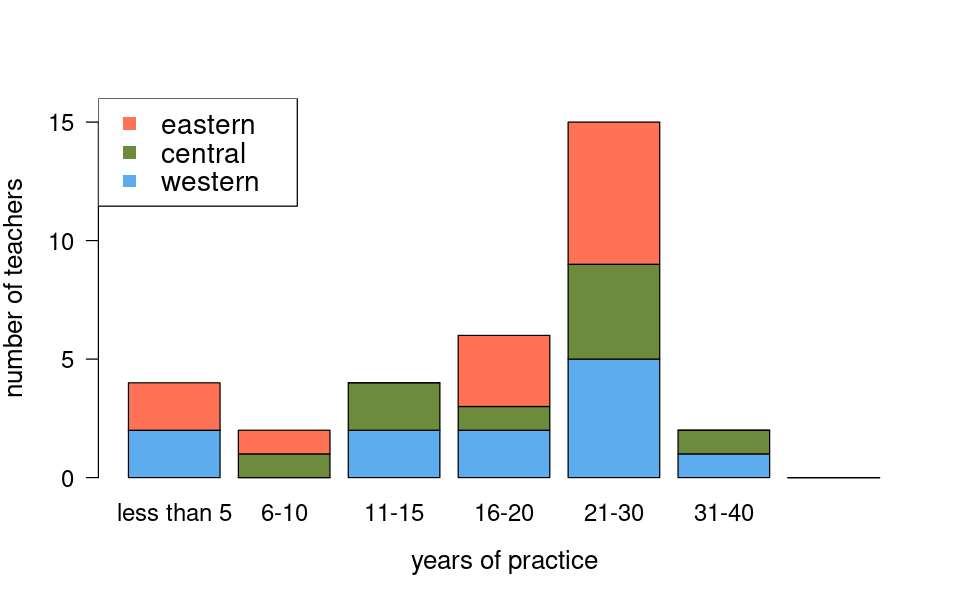

In [17]:
options(repr.plot.width=8, repr.plot.height=5); par(cex.lab = 1.3, cex.axis = 1.2)
barplot(table(data$region, data$practice), 
        las = 1, ylim = c(0,16), xlab = "years of practice", ylab = "number of teachers",
         col = c("steelblue2", "darkolivegreen4", "coral1"))
legend("topleft", rev(levels(data$region)), col = rev(c("steelblue2", "darkolivegreen4", "coral1")), 
       pch = 15, cex = 1.4, y.intersp =  1.3)

## Heatmap - Using Shiny in the future

In [18]:
##names of first eight columns
colnames(data)

[1] "ID"                 "gender"             "future app use"    
[4] "next app extension" "practice"           "region"

In [19]:
nrow(data)

[1] 33

In [20]:
## contingency table
Tab <- table(data$`future app use`, 
      data$practice)
Tab

               
                less than 5 6-10 11-15 16-20 21-30 31-40 more than 40
  certainly yes           1    1     4     1     8     0            0
  yes                     2    1     0     4     3     2            0
  don't know              1    0     0     1     4     0            0
  no                      0    0     0     0     0     0            0
  certainly no            0    0     0     0     0     0            0

In [21]:
## transformation of contingency table
DF <- as.data.frame(Tab)
colnames(DF) <- c("future app use", "years of practice", "count")
DF <- DF[DF$`years of practice` != "more than 40",]
colnames(DF)[3] <- "count"
DF

future app use,years of practice,count
<fct>,<fct>,<int>
certainly yes,less than 5,1
yes,less than 5,2
don't know,less than 5,1
no,less than 5,0
certainly no,less than 5,0
certainly yes,6-10,1
yes,6-10,1
don't know,6-10,0
no,6-10,0


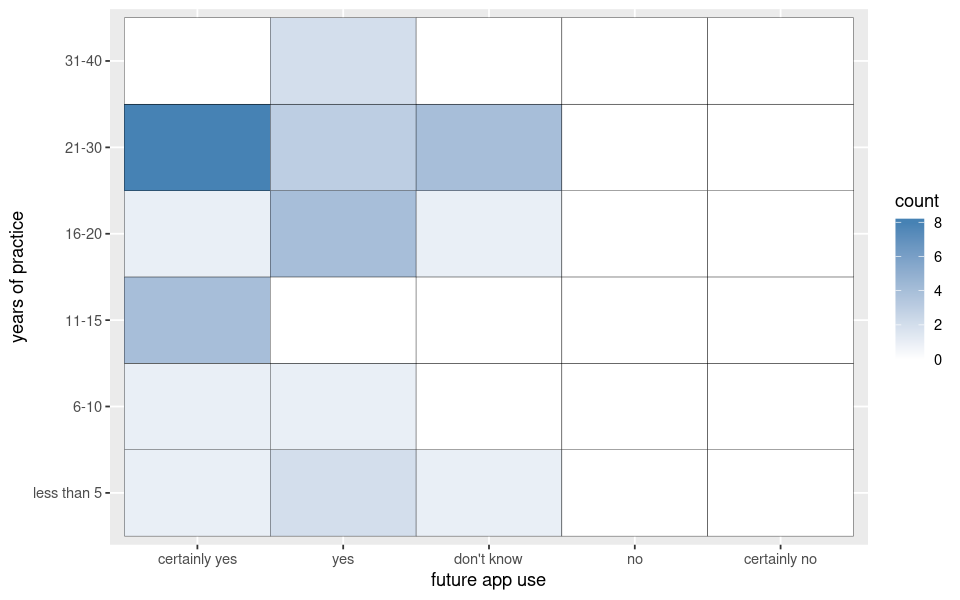

In [22]:
## heat map
options(repr.plot.width=8, repr.plot.height=5)
ggplot(DF, aes(x = `future app use`, y = `years of practice`)) +
   geom_tile(aes(fill = count), colour = "black") +
   scale_fill_gradient(low = "white", high = "steelblue")

## Heatmap - Next extension of Shiny

In [23]:
## transformation of contingency table
DF2 <- as.data.frame(table(data$`next app extension`, 
                           data$practice))
colnames(DF2) <- c("next app extension", "years of practice", "count")
DF2 <- DF2[DF2$`years of practice` != "more than 40",]
colnames(DF2)[3] <- "count"
DF2

next app extension,years of practice,count
<fct>,<fct>,<int>
strongly agree,less than 5,3
agree,less than 5,1
neutral,less than 5,0
disagree,less than 5,0
strongly disagree,less than 5,0
strongly agree,6-10,1
agree,6-10,1
neutral,6-10,0
disagree,6-10,0


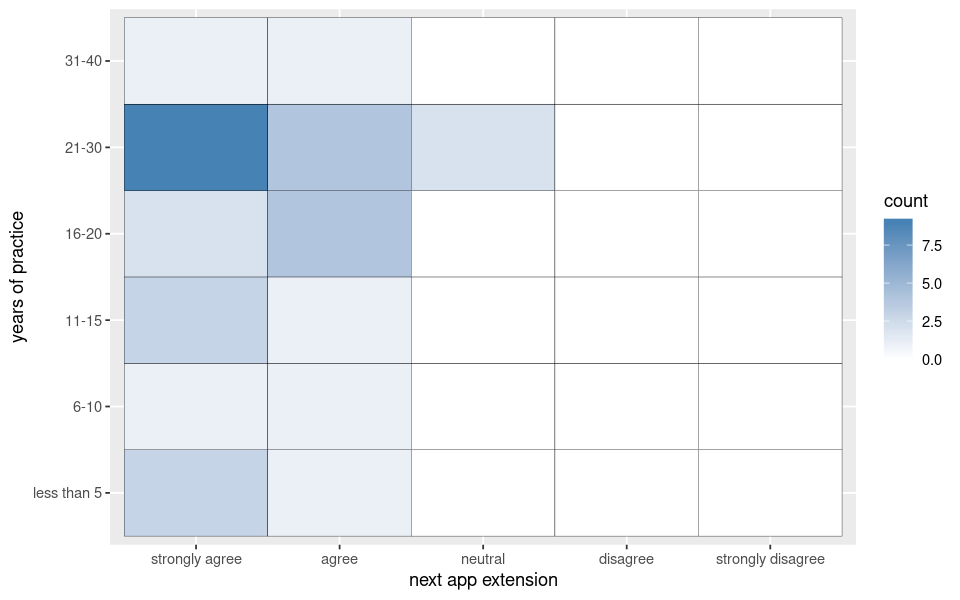

In [24]:
## heat map
options(repr.plot.width=8, repr.plot.height=5)
ggplot(DF2, aes(x = `next app extension`, y = `years of practice`)) +
   geom_tile(aes(fill = count), colour = "black") +
   scale_fill_gradient(low = "white", high = "steelblue")

## Heatmap - Dimensions of UEQ

In [25]:
## merge data
data_merged <- merge(x = tab, y = data[,c('ID','practice')], by.x = "ID", by.y = "ID", all = FALSE)
colnames(data_merged)[ncol(data_merged)] <- "years of practice"
data_merged <- data_merged[,-1]
data_merged

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,years of practice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2.6666667,1.50,1.25,1.75,2.50,3.00,16-20
-0.6666667,0.00,0.00,0.00,-0.50,-1.00,11-15
1.6666667,0.25,2.25,-0.75,1.25,2.75,21-30
0.5000000,0.25,0.75,0.50,-0.25,0.50,21-30
2.6666667,2.00,3.00,2.25,2.75,2.75,6-10
1.0000000,0.50,0.50,0.75,1.50,0.25,31-40
1.0000000,2.00,1.75,1.50,1.50,1.75,21-30
1.6666667,0.50,0.75,1.50,1.00,1.75,21-30
0.5000000,-0.25,0.25,0.00,1.00,0.00,21-30


In [26]:
## just look on splitted data
split(data_merged, data_merged$`years of practice`)

,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,years of practice
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
20,1.3333333,1.50,1.75,1.75,1.50,0.25,less than 5
24,2.5000000,2.75,2.25,2.50,2.00,2.25,less than 5
28,1.1666667,1.75,2.50,1.50,0.75,0.75,less than 5
29,0.3333333,0.25,0.75,0.75,0.75,0.50,less than 5
,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,years of practice
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,2.666667,2.00,3.00,2.25,2.75,2.75,6-10
13,2.166667,1.25,2.25,2.00,0.75,1.50,6-10
,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,years of practice


In [27]:
## calculated mean for each category of practice in each dimension
data_aggregated <- aggregate(.~ `years of practice`, data = data_merged, FUN = mean)
data_aggregated

years of practice,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
less than 5,1.3333333,1.562500,1.812500,1.6250000,1.250000,0.9375
6-10,2.4166667,1.625000,2.625000,2.1250000,1.750000,2.1250
11-15,1.5416667,1.625000,1.750000,1.5625000,1.500000,1.5000
16-20,1.4166667,1.541667,1.375000,1.0416667,1.375000,1.3750
21-30,1.1666667,1.250000,1.266667,0.9333333,1.016667,1.2500
31-40,0.5833333,1.000000,0.500000,0.6250000,0.750000,0.1250


In [28]:
## transformation of table above
DF3 <- data.frame("dimension" = rep(dimensions, each = 6), 
                  "average" = c(data_aggregated$Attractiveness, data_aggregated$Perspicuity, 
                                       data_aggregated$Efficiency, data_aggregated$Dependability, 
                                       data_aggregated$Stimulation, data_aggregated$Novelty),
                  "practice" = c("less than 5", "6-10", "11-15", "16-20", "21-30", "31-40"))

In [29]:
colnames(DF3) <- c("dimension", "average", "years of practice")

In [30]:
DF3$`years of practice` <- factor(DF3$`years of practice`, levels = c("less than 5", "6-10", "11-15", "16-20", "21-30", "31-40"))
DF3

dimension,average,years of practice
<fct>,<dbl>,<fct>
Attractiveness,1.3333333,less than 5
Attractiveness,2.4166667,6-10
Attractiveness,1.5416667,11-15
Attractiveness,1.4166667,16-20
Attractiveness,1.1666667,21-30
Attractiveness,0.5833333,31-40
Perspicuity,1.5625000,less than 5
Perspicuity,1.6250000,6-10
Perspicuity,1.6250000,11-15


In [31]:
levelsdim =c('Attractiveness','Perspicuity', 'Efficiency', 'Dependability', 'Stimulation', 'Novelty')
DF3$dimension<-factor(DF3$dimension, levels = levelsdim)

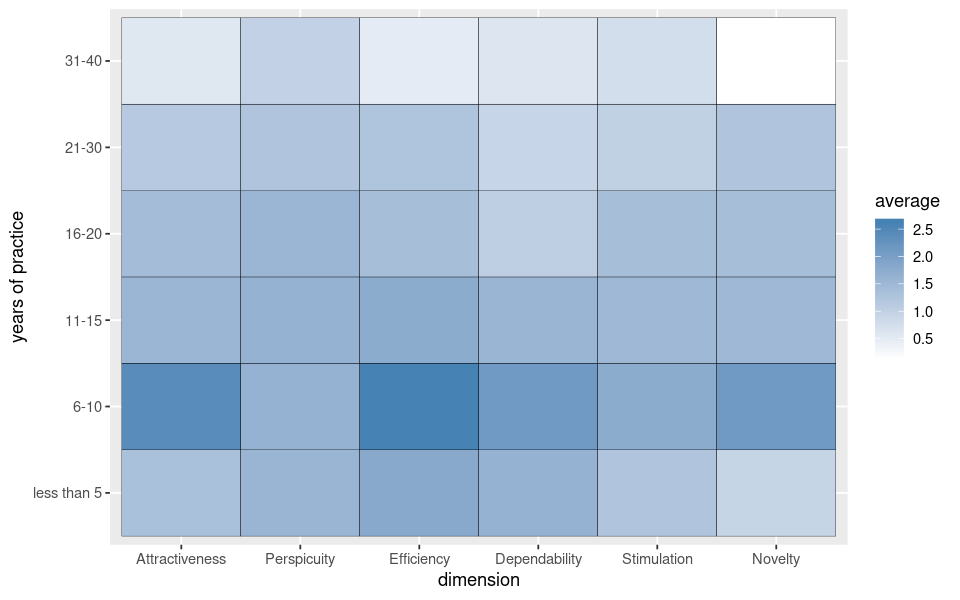

In [32]:
## heat map
options(repr.plot.width=8, repr.plot.height=5)
ggplot(DF3, aes(x = dimension, y = `years of practice`)) +
   geom_tile(aes(fill = average), colour = "black") +
   scale_fill_gradient(low = "white", high = "steelblue")